# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [ ]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [ ]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [ ]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income
df_pct_poverty
df_pct_completed_hs
df_share_race_city
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_hh_income.fillna(0, inplace=True)

In [ ]:
df_fatalities.fillna(0, inplace=True)


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [ ]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].str.replace("-","0").astype(float)

In [ ]:
avg_poverty_rate = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index(name='Average Poverty Rate').sort_values('Average Poverty Rate', ascending=True)
avg_poverty_rate.head()

,Geographic Area,Average Poverty Rate
31,NJ,8.16
50,WY,9.06
6,CT,9.14
19,MA,9.55
20,MD,10.27


<BarContainer object of 51 artists>

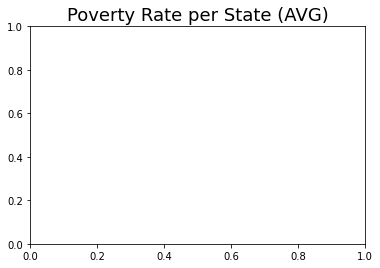

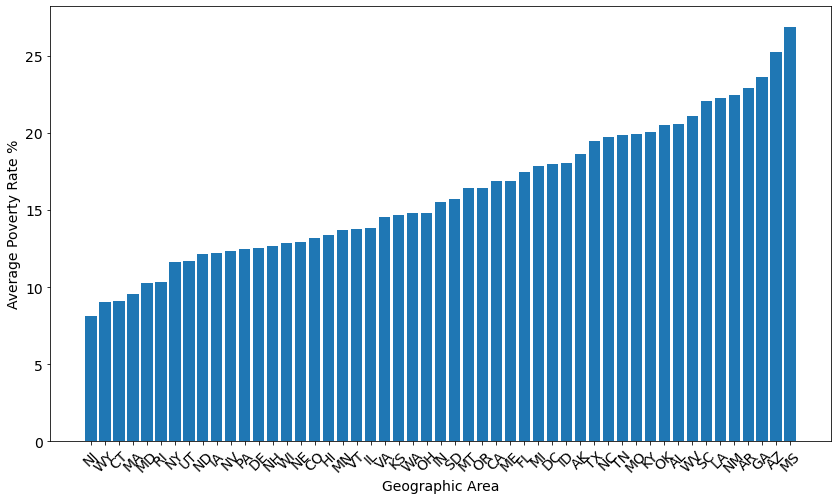

In [ ]:
plt.title('Poverty Rate per State (AVG)', fontsize=18)
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Average Poverty Rate %', fontsize=14)
plt.xlabel('Geographic Area', fontsize=14)

plt.bar(avg_poverty_rate["Geographic Area"], avg_poverty_rate["Average Poverty Rate"])

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].str.replace("-","0").astype(float)

In [ ]:
avg_graduation_rate = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index(name='Average Graduation Rate').sort_values('Average Graduation Rate', ascending=True)
avg_graduation_rate

,Geographic Area,Average Graduation Rate
43,TX,74.09
25,MS,78.47
10,GA,78.63
32,NM,78.97
18,LA,79.12
3,AZ,79.22
2,AR,79.95
0,AK,80.10
1,AL,80.16
40,SC,80.65


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
avg_graduation_rate = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index(name='Average Graduation Rate')
avg_graduation_rate.head()

,Geographic Area,Average Graduation Rate
0,AK,80.10
1,AL,80.16
2,AR,79.95
3,AZ,79.22
4,CA,80.82


In [ ]:
avg_poverty_rate = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index(name='Average Poverty Rate')
avg_poverty_rate.head()

,Geographic Area,Average Poverty Rate
0,AK,18.68
1,AL,20.61
2,AR,22.96
3,AZ,25.27
4,CA,16.89


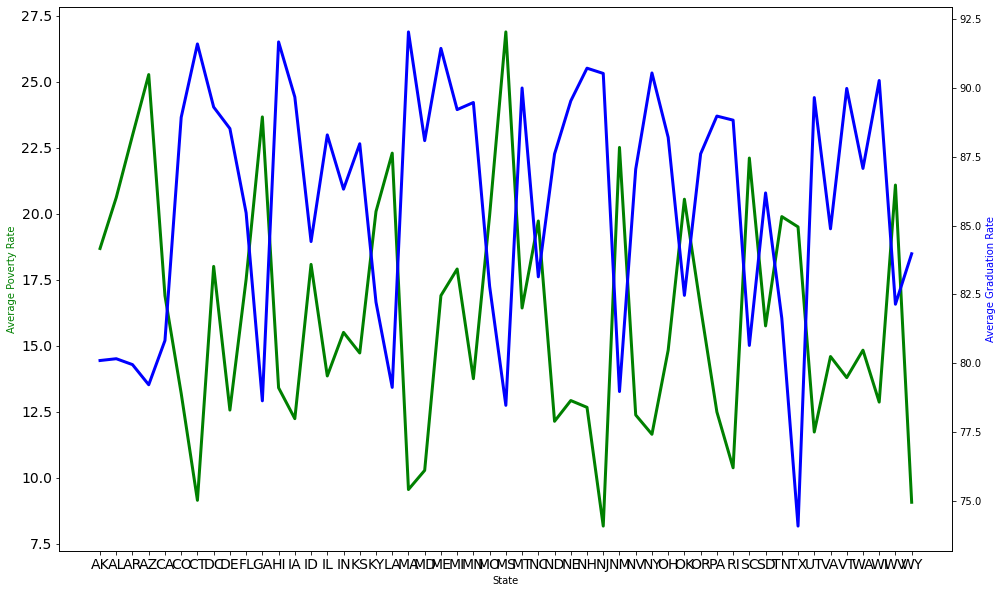

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot()
ax2.plot()
ax1.set_xlabel('State')
ax1.set_ylabel('Average Poverty Rate', color = 'green')
ax2.set_ylabel('Average Graduation Rate', color = 'blue')

ax2.plot(avg_graduation_rate["Geographic Area"],avg_graduation_rate["Average Graduation Rate"], linewidth=3, color='blue', label="Average Graduation Rate")
ax1.plot(avg_poverty_rate["Geographic Area"],avg_poverty_rate["Average Poverty Rate"], linewidth=3, color='green', label="Average Poverty Rate")


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

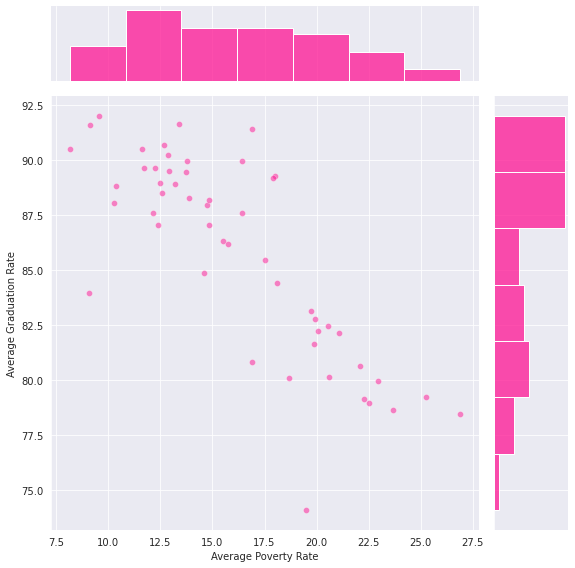

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=avg_graduation_rate["Average Poverty Rate"], 
                y=avg_graduation_rate["Average Graduation Rate"], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

In [ ]:
avg_graduation_rate["Average Poverty Rate"] = avg_poverty_rate["Average Poverty Rate"]
avg_graduation_rate.head()

,Geographic Area,Average Graduation Rate,Average Poverty Rate
0,AK,80.10,18.68
1,AL,80.16,20.61
2,AR,79.95,22.96
3,AZ,79.22,25.27
4,CA,80.82,16.89


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

[Text(0, 0.5, 'Average Graduation Rate'), Text(0.5, 0, 'Average Poverty Rate')]

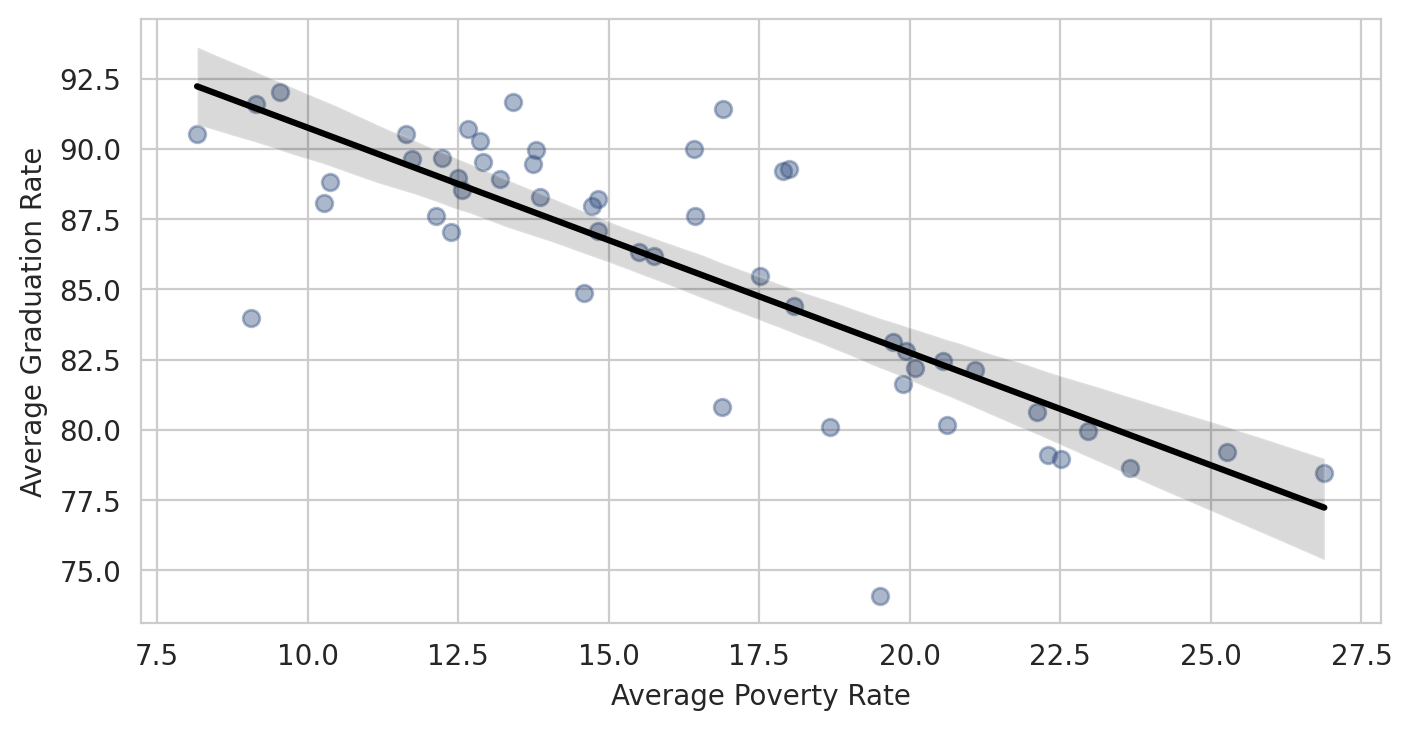

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=avg_graduation_rate, 
            x='Average Poverty Rate', 
            y='Average Graduation Rate',
						color='#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

ax.set(ylabel='Average Graduation Rate',xlabel='Average Poverty Rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


In [ ]:
racial_info = df_share_race_city.groupby("Geographic area").agg({'share_white':pd.Series.mean, 'share_black':pd.Series.mean, 'share_native_american':pd.Series.mean, 'share_asian':pd.Series.mean, 'share_hispanic':pd.Series.mean})
racial_info.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


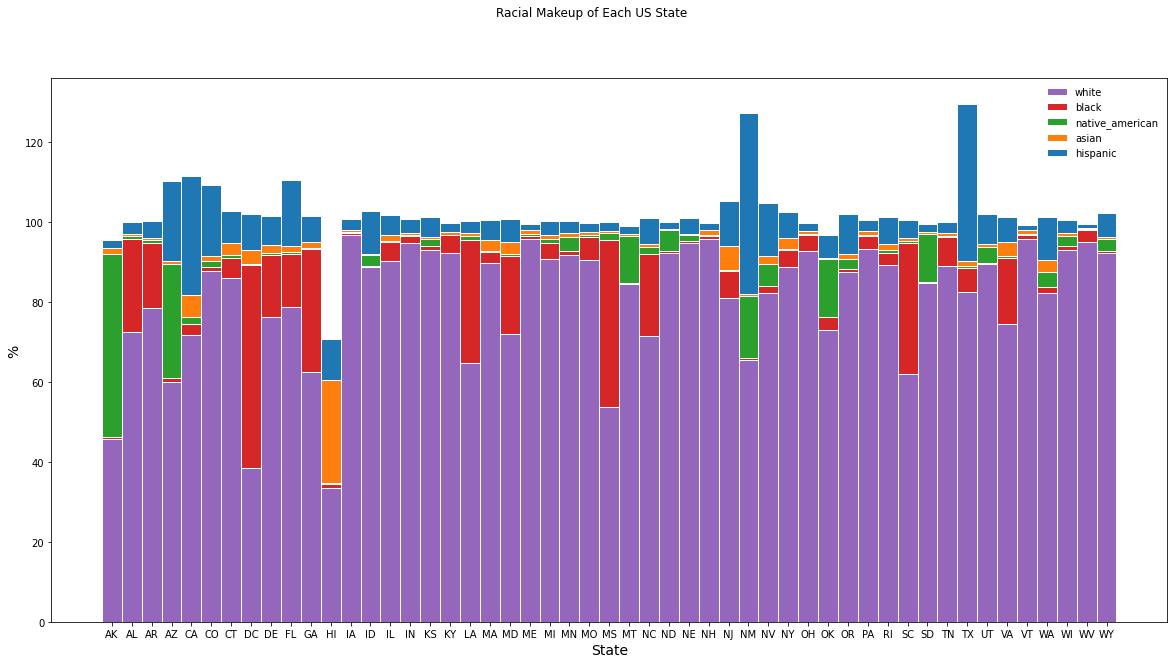

In [ ]:
fig = plt.figure(figsize=(20, 10))

plt.suptitle('Racial Makeup of Each US State')
plt.ylabel('%', fontsize=14)
plt.xlabel('State', fontsize=14)

p5 = plt.bar(racial_info.index, racial_info["share_white"]+racial_info["share_black"]+racial_info["share_native_american"]+racial_info["share_asian"]+racial_info["share_hispanic"], align='center', edgecolor='white', width= 1, label="hispanic")
p4 = plt.bar(racial_info.index, racial_info["share_white"]+racial_info["share_black"]+racial_info["share_native_american"]+racial_info["share_asian"], align='center', edgecolor='white', width= 1, label="asian")
p3 = plt.bar(racial_info.index, racial_info["share_white"]+racial_info["share_black"]+racial_info["share_native_american"], align='center', edgecolor='white', width= 1, label="native_american")
p2 = plt.bar(racial_info.index, racial_info["share_white"]+racial_info["share_black"], align='center', edgecolor='white', width= 1, label="black")
p1 = plt.bar(racial_info.index, racial_info["share_white"], align='center', edgecolor='white', width= 1, label="white")

plt.legend(handles=[p1, p2, p3, p4, p5], loc='best', frameon=False)

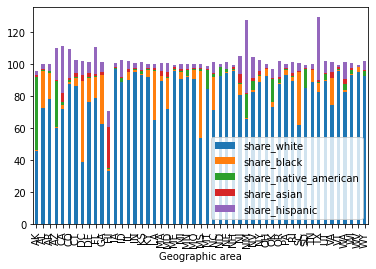

In [ ]:
racial_info.plot.bar(stacked=True)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
race_fatalities = df_fatalities.groupby("race").count()["id"].reset_index(name='fatalities')
race_fatalities

,race,fatalities
0,0,195
1,A,39
2,B,618
3,H,423
4,N,31
5,O,28
6,W,1201


In [ ]:
fig = px.pie(labels=race_fatalities.race, 
             values=race_fatalities.fatalities,
             title="Fatalities by Race",
             names=["0","Asian", "Black", "Hispanic", "Native American", "O", "White"],
             hole=0.6,
             )
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=15)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
gender_fatalities = df_fatalities.groupby("gender").count()["id"].reset_index(name='fatalities')
gender_fatalities

,gender,fatalities
0,F,107
1,M,2428


In [ ]:
fig = px.pie(labels=gender_fatalities.gender, 
             values=gender_fatalities.fatalities,
             title="Fatalities by Gender",
             names=["Female", "Male"],
             hole=0.6,
             )
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=15)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
death_manner = df_fatalities.groupby("manner_of_death").count()["id"].reset_index(name='fatalities')
death_manner

,manner_of_death,fatalities
0,shot,2363
1,shot and Tasered,172


In [ ]:
box = px.box(df_fatalities,
                 y='age',
                 x='manner_of_death',
                 color='age',
                 notched=True,
                 points='all',
                 title='manner_of_death vs age')
     
     
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
armed_fatalities = df_fatalities.groupby("armed").count()["id"].reset_index(name='fatalities')
armed_fatalities

,armed,fatalities
0,0,9
1,Taser,9
2,air conditioner,1
3,ax,9
4,baseball bat,8
...,...,...
64,toy weapon,104
65,unarmed,171
66,undetermined,117
67,unknown weapon,18


In [ ]:
bar = px.bar(x = armed_fatalities.armed, # index = category name
                 y = armed_fatalities.fatalities,
								 title='Armed type fatalities')

bar.update_layout(xaxis_title='Weapon', yaxis_title='Fatalities')
     
bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
all_killed = len(df_fatalities.index)
under_25_killed = len(df_fatalities[df_fatalities["age"] < 25])

print(f"{(under_25_killed/all_killed)*100}% of people killed were under 25 years old.")

20.78895463510848% of people killed were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

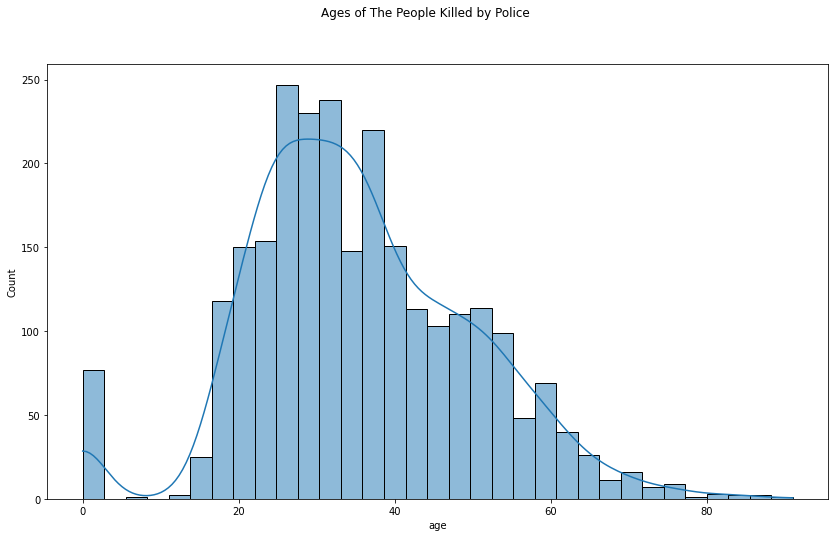

In [ ]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()



Create a seperate KDE plot for each race. Is there a difference between the distributions? 

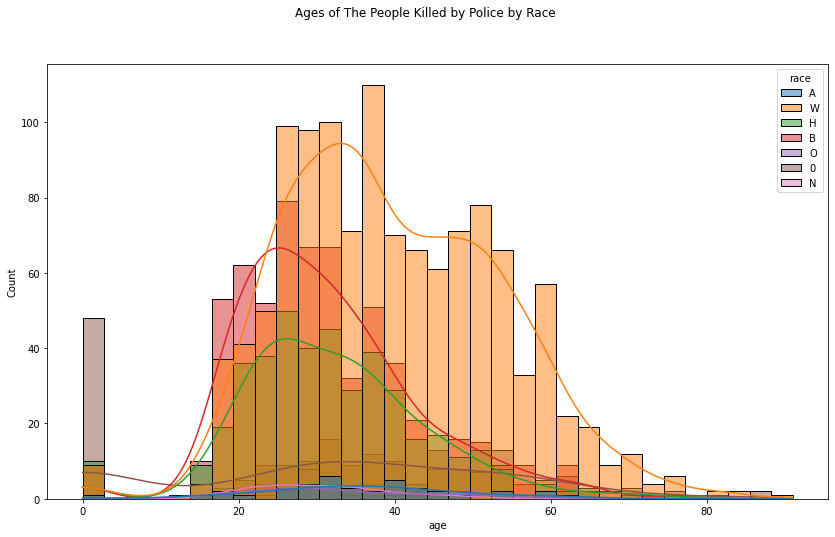

In [ ]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police by Race')
sns.histplot(data=df_fatalities, x="age", kde=True, hue="race")
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
killed_by_race = df_fatalities.groupby("race")["id"].count().reset_index(name='fatalities')
killed_by_race

,race,fatalities
0,0,195
1,A,39
2,B,618
3,H,423
4,N,31
5,O,28
6,W,1201


In [ ]:
fig = px.pie(labels=killed_by_race.race, 
             values=killed_by_race.fatalities,
             title="Fatalities by Race",
             names=["0","Asian", "Black", "Hispanic", "Native American", "O", "White"],
             hole=0.6,
             )
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=15)
fig.show()

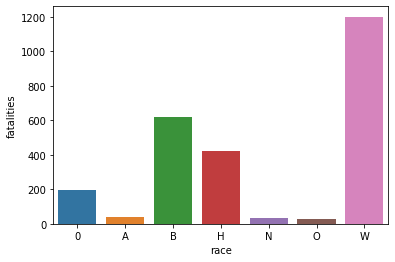

In [ ]:
sns.barplot(data=killed_by_race, x="race", y="fatalities")

In [ ]:
killed_by_race.fatalities.sum()

2535

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental = df_fatalities.groupby("signs_of_mental_illness").count()["id"].reset_index(name='fatalities')
mental

,signs_of_mental_illness,fatalities
0,False,1902
1,True,633


In [ ]:
mental["fatalities"][1] / mental["fatalities"].sum() * 100 

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
city_fatalities = df_fatalities.groupby("city").count()["id"].reset_index(name='fatalities').sort_values('fatalities', ascending=False)[0:10]
city_fatalities

,city,fatalities
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
1118,San Antonio,20
284,Columbus,19
808,Miami,18
60,Austin,18
1217,St. Louis,15


In [ ]:
bar = px.bar(x = city_fatalities.city, # index = category name
                 y = city_fatalities.fatalities,
								 title='fatalities vs city')

bar.update_layout(xaxis_title='city', yaxis_title='fatalities')
     
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
top_10_city = city_fatalities["city"].tolist()
top_10_city

['Los Angeles',
 'Phoenix',
 'Houston',
 'Chicago',
 'Las Vegas',
 'San Antonio',
 'Columbus',
 'Miami',
 'Austin',
 'St. Louis']

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
filter_10_cities = df_fatalities[df_fatalities["city"].isin(top_10_city)]

filter_10_cities = filter_10_cities.groupby(["city", "race"]).count()["id"].reset_index(name='fatalities')
filter_10_cities

,city,race,fatalities
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,0,1
4,Chicago,B,21
5,Chicago,H,1
6,Chicago,W,2
7,Columbus,0,1
8,Columbus,B,11
9,Columbus,O,1


In [ ]:
reshaped_filter_10_cities = filter_10_cities.pivot(index='city', columns='race', values='fatalities')
reshaped_filter_10_cities.fillna(0, inplace=True)
reshaped_filter_10_cities

race,0,A,B,H,N,O,W
city,,,,,,,
Austin,0.00,0.00,3.00,2.00,0.00,0.00,13.00
Chicago,1.00,0.00,21.00,1.00,0.00,0.00,2.00
Columbus,1.00,0.00,11.00,0.00,0.00,1.00,6.00
Houston,1.00,1.00,15.00,6.00,1.00,0.00,3.00
Las Vegas,4.00,0.00,3.00,5.00,0.00,0.00,9.00
Los Angeles,3.00,1.00,10.00,19.00,0.00,0.00,6.00
Miami,1.00,0.00,8.00,6.00,0.00,0.00,3.00
Phoenix,3.00,0.00,2.00,11.00,3.00,0.00,12.00
San Antonio,2.00,0.00,3.00,12.00,0.00,0.00,3.00


Text(0.5, 1.0, 'Fatalities by Race in top 10 Cities')

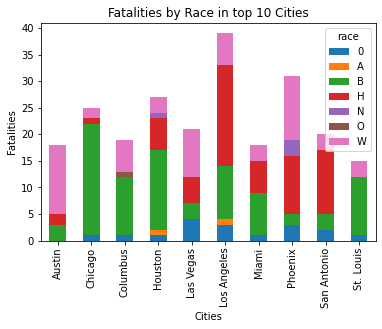

In [ ]:
ax = reshaped_filter_10_cities.plot(kind='bar', stacked=True)
ax.set_xlabel('Cities')
ax.set_ylabel('Fatalities')
ax.set_title('Fatalities by Race in top 10 Cities')


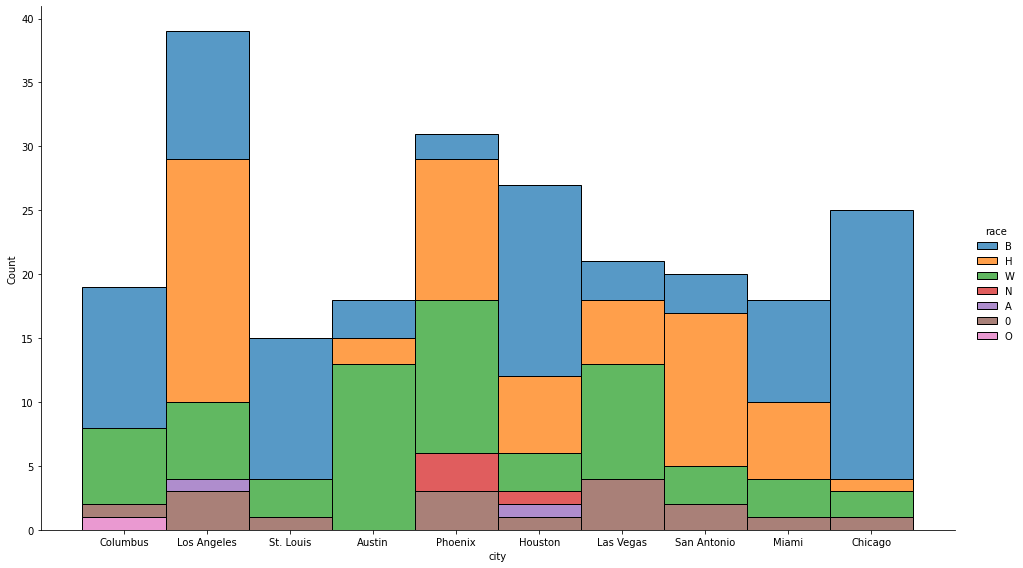

In [ ]:
filter_10_cities = df_fatalities[df_fatalities["city"].isin(top_10_city)]

sns.displot(filter_10_cities, x='city', hue='race', multiple='stack',  
             height=8, aspect=1.7);

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
states_to_map = df_fatalities.groupby('state').count()["id"].sort_values(ascending=False).reset_index(name='fatalities')
states_to_map



,state,fatalities
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=states_to_map.state,
    z = states_to_map.fatalities,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa',
)





# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities.date = pd.to_datetime(df_fatalities.date, infer_datetime_format=True).dt.to_period('m')

In [ ]:
fatalities_by_time = df_fatalities.groupby('date').count()['id'].sort_values(ascending=False).reset_index(name='fatalities')
fatalities_by_time.head()

,date,fatalities
0,2015-09,90
1,2016-06,90
2,2015-10,89
3,2016-03,89
4,2015-04,88


In [ ]:
bar = px.bar(x = fatalities_by_time.index,
                 y = fatalities_by_time.fatalities,
								 title='fatalities vs month')
bar.update_layout(xaxis_title='month', yaxis_title='fatalities')
     
bar.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).